In [1]:
import sys
sys.path = ['../../'] + sys.path

In [2]:
import ngauge
from ngauge import Neuron

In [3]:
n = Neuron.from_swc('GGB-12-31-2013-2R.CNG.swc')

In [4]:
getattr(n, "all_branch_angles")

<bound method Neuron.all_branch_angles of {Neuron of 6 branches and 1 soma layers}>

CPU times: user 51.6 s, sys: 149 ms, total: 51.7 s
Wall time: 51.9 s


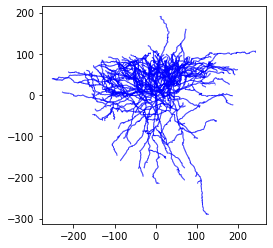

In [5]:
%%time

error_log = {}
output_log = {}

for method in dir(n):
    if method.startswith('__'):
        continue
    
    try:
        res = getattr(n,method)()
        output_log[method] = res
    except TypeError:
        error_log[method] = "TypeError"
    except ValueError:
        error_log[method] = "ValueError"

In [6]:
"""
This is the collection of errors that occured in running all of the
methods in the Neuron class. Some failures are normal, including:

- add_branch + add_soma_points
    -> Should fail due to not having parameters
- from_swc + from_swc_text
    -> Doesn't have file specified (used to load the neuron)
- metadata, soma_layers, branches
    -> Is a parameter not a function (see below)
- soma_surface_area + soma_volume
    -> This neuron does not have a volumetric soma, so these functions are not defined
"""

error_log

{'add_branch': 'TypeError',
 'add_soma_points': 'TypeError',
 'branches': 'TypeError',
 'from_swc': 'TypeError',
 'from_swc_text': 'TypeError',
 'metadata': 'TypeError',
 'soma_layers': 'TypeError',
 'soma_surface_area': 'ValueError',
 'soma_volume': 'ValueError'}

In [7]:
n.metadata

'# SWC to SWC conversion from L-Measure. Sridevi Polavaram: spolavar@gmu.edu\n# Original fileName:C:\\NMO_dev\\data_proc\\Gonzalez-Burgos_Final\\Source_Temp1//GGB-12-31-2013-2R.CNG.swc\n#\n'

In [8]:
n.soma_layers

defaultdict(<function ngauge.Neuron.Neuron.__init__.<locals>.<lambda>()>,
            {0.0: [TracingPoint(x=0.003333333333333336, y=-0.0033333333333332624, z=0.0, r=4.652, t=1),
              TracingPoint(x=0.5233333333333333, y=-4.573333333333333, z=0.0, r=4.652, t=1),
              TracingPoint(x=-0.5266666666666667, y=4.576666666666667, z=0.0, r=4.652, t=1)]})

In [9]:
n.branches

[TracingPoint(x=0.003333333333333336, y=-0.0033333333333332624, z=0.0, r=4.652, t=1, children=[TracingPoint(x=-4.186666666666667, y=2.7066666666666666, z=2.23, r=0.63, t=4, children=[{ 1, truncated }], parent={...})]),
 TracingPoint(x=0.003333333333333336, y=-0.0033333333333332624, z=0.0, r=4.652, t=1, children=[TracingPoint(x=3.6633333333333336, y=4.686666666666667, z=-5.76, r=0.55, t=4, children=[{ 1, truncated }], parent={...})]),
 TracingPoint(x=0.003333333333333336, y=-0.0033333333333332624, z=0.0, r=4.652, t=1, children=[TracingPoint(x=-2.9166666666666665, y=-1.7933333333333332, z=0.23, r=0.575, t=4, children=[{ 1, truncated }], parent={...})]),
 TracingPoint(x=0.003333333333333336, y=-0.0033333333333332624, z=0.0, r=4.652, t=1, children=[TracingPoint(x=-4.216666666666667, y=-0.4133333333333332, z=4.23, r=0.575, t=4, children=[{ 1, truncated }], parent={...})]),
 TracingPoint(x=0.003333333333333336, y=-0.0033333333333332624, z=0.0, r=4.652, t=1, children=[TracingPoint(x=-1.706666

In [10]:
output_log

{'all_branch_angles': [20.767004382320962,
  101.60959487577335,
  127.80433266575047,
  112.96475956047956,
  49.832101801308504,
  74.72848307261876,
  77.78428086586885,
  66.01407585726507,
  117.48077503347407,
  31.310423347206733,
  52.736079037391,
  22.886496753246547,
  94.67928307633105,
  57.34020625044724,
  95.08727521950175,
  97.04130542340688,
  151.6007573612567,
  116.94623761190708,
  36.236865888094535,
  44.0027243060863,
  112.5932157501884,
  158.99031596584015,
  85.02240961755248,
  137.00015151759476,
  151.60635429738073,
  37.38624136268423,
  144.29040388554915,
  96.11587654619598,
  42.62647964484775,
  108.11771262224724,
  139.42090441278268,
  4.337163615360645,
  65.54691198110567,
  112.87664730874036,
  167.58356887269255,
  82.8591750703802,
  114.30652830313291,
  71.11126599059267,
  66.08591671811794,
  101.94110660299933,
  110.88960234430698,
  106.3081429921548,
  67.38184377327934,
  124.59642828358541,
  94.67946566439318,
  105.2500277032

In [11]:
len(output_log)

54